# CIFAR100 데이터 가져오기

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR100
import torchvision.transforms as tt
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split,ConcatDataset

stats = ((0.5074,0.4867,0.4411),(0.2011,0.1987,0.2025))
train_transform = tt.Compose([
    tt.RandomHorizontalFlip(),
    tt.RandomCrop(32,padding=4,padding_mode="reflect"),
    tt.ToTensor(),
    tt.Normalize(*stats)
])

test_transform = tt.Compose([
    tt.ToTensor(),
    tt.Normalize(*stats)
])

train_data = CIFAR100(download=True,root="./data",transform=train_transform)
test_data = CIFAR100(download=True, root="./data",train=False,transform=test_transform)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
for image,label in train_data:
    print("Image shape: ",image.shape)
    print("Image tensor: ", image)
    print("Label: ", label)
    break

Image shape:  torch.Size([3, 32, 32])
Image tensor:  tensor([[[-0.1636,  0.7140,  1.1625,  ...,  2.4495,  2.4300,  2.4495],
         [ 0.3240,  0.6165,  0.7920,  ...,  2.4300,  2.4300,  2.4495],
         [ 1.0260,  1.6110,  1.2795,  ...,  2.4495,  2.4495,  2.4495],
         ...,
         [-0.6706, -0.9436, -1.0996,  ...,  1.0260,  0.8115,  0.6750],
         [-0.9631, -1.1581, -1.5676,  ...,  0.5580,  0.5970,  0.4605],
         [-1.0411, -1.2556, -1.9381,  ...,  0.2070,  0.2460,  0.3630]],

        [[ 0.1755,  1.0636,  1.4781,  ...,  2.5833,  2.5636,  2.5833],
         [ 0.5899,  0.8662,  1.0241,  ...,  2.5636,  2.5636,  2.5833],
         [ 1.3794,  1.9715,  1.5965,  ...,  2.5833,  2.5833,  2.5833],
         ...,
         [-0.7719, -1.1271, -1.3442,  ...,  1.8925,  1.7149,  1.5767],
         [-0.9692, -1.2653, -1.7784,  ...,  1.4781,  1.5373,  1.3794],
         [-0.9297, -1.2258, -2.1139,  ...,  1.0833,  1.1426,  1.2018]],

        [[-0.4934,  0.3393,  1.0945,  ...,  2.7600,  2.7406,  2

In [6]:
# divide data into batches

BATCH_SIZE=128
train_dl = DataLoader(train_data,BATCH_SIZE,num_workers=4,pin_memory=True,shuffle=True)
test_dl = DataLoader(test_data,BATCH_SIZE,num_workers=4,pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


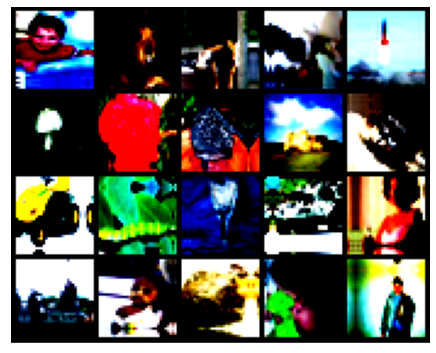

In [11]:
def show_batch(dl):
    for batch in dl:
        images,labels = batch
        fig, ax = plt.subplots(figsize=(7.5,7.5))
        ax.set_yticks([])
        ax.set_xticks([])
        ax.imshow(make_grid(images[:20],nrow=5).permute(1,2,0))
        break

show_batch(train_dl)